In [100]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB

In [101]:
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import re


In [102]:
import matplotlib.image as image
import matplotlib.colors
from collections import defaultdict

from PIL import Image
from IPython.display import Image as im


In [103]:
import string
# Importando todo NLTK
import nltk

# Tambien se puede importar modulos
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

#Downloading NLP corpus from NLTK 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [104]:
wine_data = pd.read_csv('winemag-data-130k-v2.csv', index_col = 0)
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [105]:
wine_data.shape

(129971, 13)

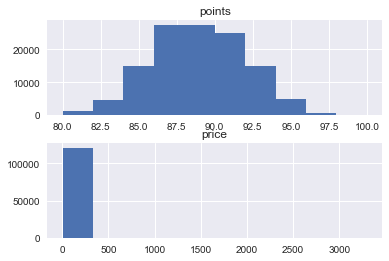

In [106]:
df = wine_data.dropna(subset=['price', 'points'])
df[['price', 'points']].hist(layout=(2,1))
plt.show()

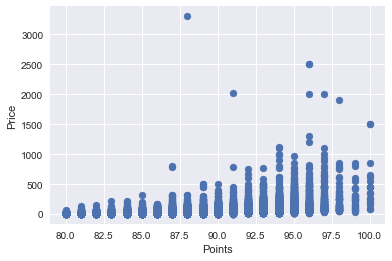

In [107]:
plt.scatter(df['points'], df['price'])
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

In [108]:
years = wine_data.title.str.extract('([1-2][0-9]{3})').astype('float64')

years[years < 1990] = None
wine_data = wine_data.assign(year = years)

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


In [109]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 14 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
year                     125138 non-null float64
dtypes: float64(2), int64(1), object(11)
memory usage: 14.9+ MB


In [110]:
wine_data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [111]:
wine_data.country.unique()

array(['Italy', 'Portugal', 'US', 'Spain', 'France', 'Germany',
       'Argentina', 'Chile', 'Australia', 'Austria', 'South Africa',
       'New Zealand', 'Israel', 'Hungary', 'Greece', 'Romania', 'Mexico',
       'Canada', nan, 'Turkey', 'Czech Republic', 'Slovenia',
       'Luxembourg', 'Croatia', 'Georgia', 'Uruguay', 'England',
       'Lebanon', 'Serbia', 'Brazil', 'Moldova', 'Morocco', 'Peru',
       'India', 'Bulgaria', 'Cyprus', 'Armenia', 'Switzerland',
       'Bosnia and Herzegovina', 'Ukraine', 'Slovakia', 'Macedonia',
       'China', 'Egypt'], dtype=object)

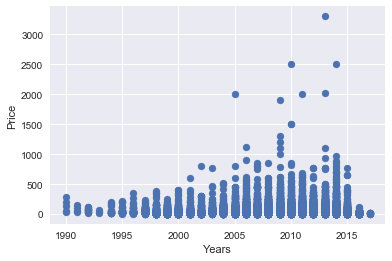

In [112]:
df2 = wine_data.dropna(subset=['price', 'year'])
plt.scatter(df2['year'], df2['price'])
plt.xlabel('Years')
plt.ylabel('Price')
plt.show()

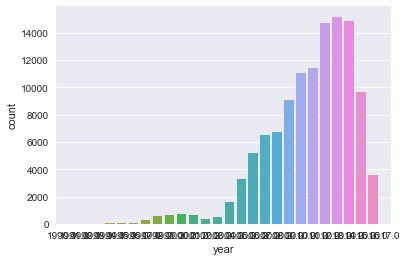

In [113]:
sns.countplot(df2['year']);

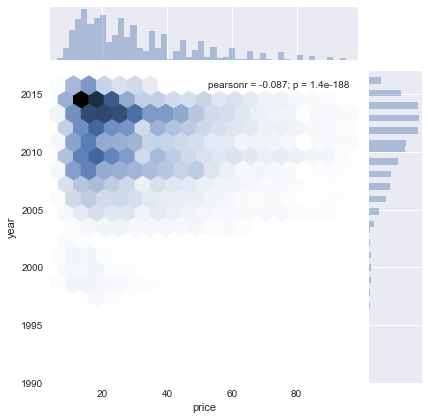

In [114]:
sns.jointplot(x='price', y='year', data=df2[df2['price'] < 100], kind='hex', 
              gridsize=20);

In [115]:
yearly_price_mean = wine_data.groupby('year').price.agg(['mean'])
yearly_price_max = wine_data.groupby('year').price.agg(['max'])
yearly_point_mean = wine_data.groupby('year').points.agg(['mean'])
yearly_point_max = wine_data.groupby('year').points.agg(['max'])

In [116]:
df2.year.value_counts().sort_index()

1990.0        5
1991.0        4
1992.0       14
1993.0        3
1994.0       23
1995.0       44
1996.0       64
1997.0      297
1998.0      540
1999.0      619
2000.0      734
2001.0      668
2002.0      332
2003.0      498
2004.0     1602
2005.0     3290
2006.0     5170
2007.0     6490
2008.0     6717
2009.0     9050
2010.0    11087
2011.0    11414
2012.0    14723
2013.0    15178
2014.0    14881
2015.0     9632
2016.0     3548
2017.0       11
Name: year, dtype: int64

In [117]:
from wordcloud import WordCloud

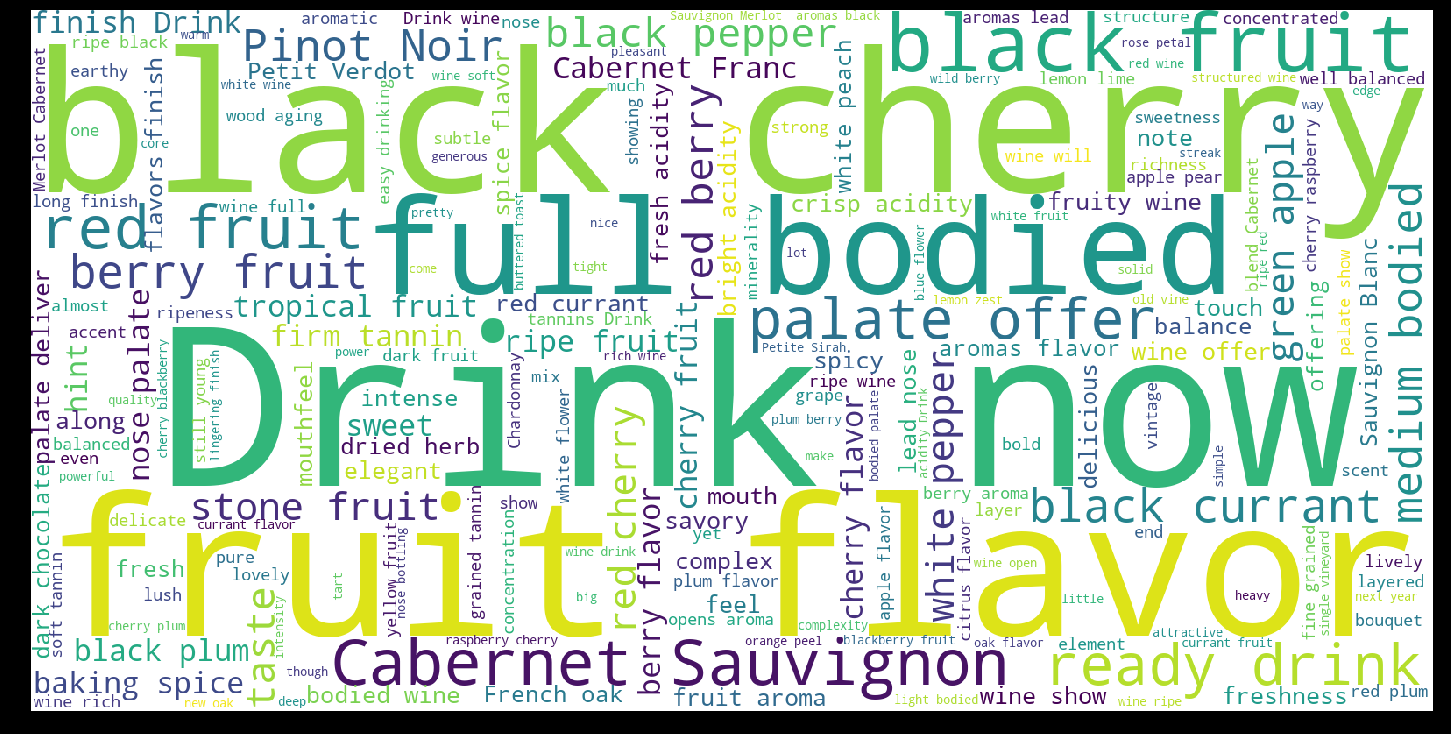

In [118]:
your_list=wine_data['description'].astype('str') 
your_list=your_list.tolist()

# Display the generated image:

wordcloud2 = WordCloud(width=1600, height=800, margin=0, background_color='white').generate(' '.join(your_list))

plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud2)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

plt.savefig('wordcloud2.png', facecolor='k', bbox_inches='tight')

In [119]:
wine_data.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [120]:
wine_data.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [121]:
price_median = wine_data.price.median()
wine_data.price.map(lambda p: p - price_median)

0          NaN
1        -10.0
2        -11.0
3        -12.0
4         40.0
5        -10.0
6         -9.0
7         -1.0
8        -13.0
9          2.0
10        -6.0
11         5.0
12         9.0
13         NaN
14       -13.0
15        -1.0
16         5.0
17       -12.0
18         3.0
19         7.0
20        -2.0
21        -5.0
22        -6.0
23        -3.0
24        10.0
25        44.0
26       -12.0
27       -15.0
28        -8.0
29        -9.0
          ... 
129941    -5.0
129942    10.0
129943     4.0
129944     0.0
129945    -5.0
129946    -8.0
129947    -5.0
129948    18.0
129949    10.0
129950    10.0
129951     5.0
129952    -3.0
129953     0.0
129954   -10.0
129955    15.0
129956    -6.0
129957    -8.0
129958    10.0
129959    32.0
129960    23.0
129961     5.0
129962    15.0
129963    -5.0
129964     NaN
129965     3.0
129966     3.0
129967    50.0
129968     5.0
129969     7.0
129970    -4.0
Name: price, Length: 129971, dtype: float64

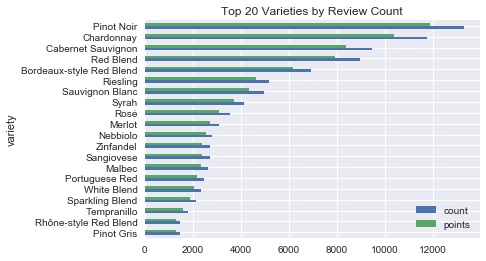

In [122]:
top_reviewed = wine_data[['variety']].groupby('variety').size().reset_index(name='count')

top_scored = wine_data[['variety', 'points']].groupby('variety').mean()
top_reviewed = top_reviewed.join(top_scored, on='variety')

top_reviewed['points'] = top_reviewed['count'] * (top_reviewed['points'] / 100)

top_reviewed.sort_values('count', ascending=False)[:20].sort_values('count').set_index("variety", drop=True).plot(kind='barh', title='Top 20 Varieties by Review Count')
plt.show()

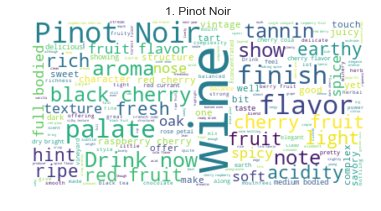

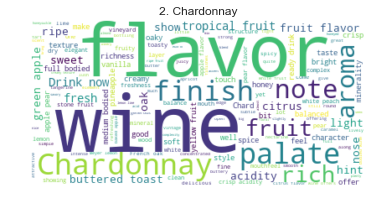

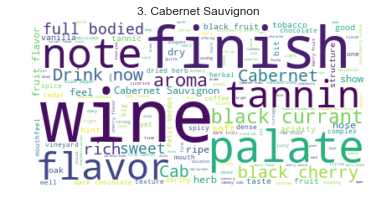

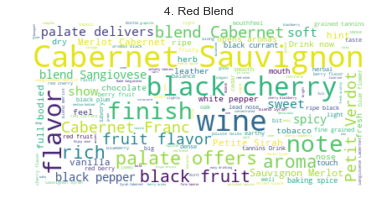

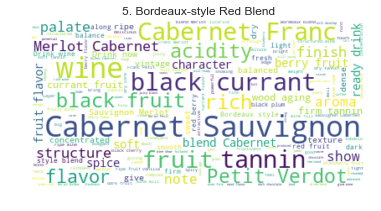

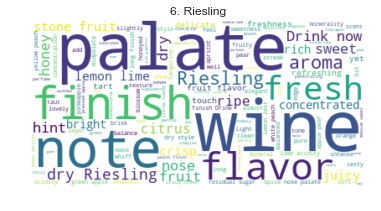

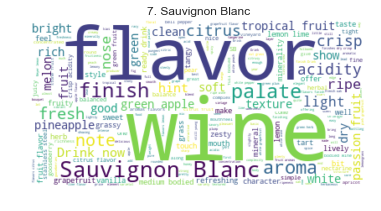

In [123]:
for number, variety_name in enumerate(top_reviewed.sort_values('count', ascending=False)[:7]['variety']):
    variety = df[df['variety'] == variety_name]
    reviews = ' '.join(' '.join(variety['description']).split())

    
    wc = WordCloud(background_color="white",  max_words=2000)
    wc.generate(text=reviews)

    try:
        plt.imshow(wc.recolor(), interpolation="bilinear")
        plt.axis("off")
        plt.title(str(number + 1) + '. ' + variety_name)
        plt.show()
    except:
        pass

In [124]:
df2=pd.DataFrame(wine_data.groupby("country")["points"].mean())
df2.sort_values("points", ascending = 0)



,points
country,
England,91.581081
India,90.222222
Austria,90.101345
Germany,89.851732
Canada,89.369650
Hungary,89.191781
China,89.000000
France,88.845109
Luxembourg,88.666667


In [125]:
df2["max"]=pd.DataFrame(wine_data.groupby("country")["points"].max())
df2["min"]=pd.DataFrame(wine_data.groupby("country")["points"].min())
df2["review count"]=wine_data["country"].value_counts()
df2.sort_values("points", ascending = 0).head(20)

,points,max,min,review count
country,,,,
England,91.581081,95,89,74
India,90.222222,93,87,9
Austria,90.101345,98,82,3345
Germany,89.851732,98,81,2165
Canada,89.369650,94,82,257
Hungary,89.191781,97,81,146
China,89.000000,89,89,1
France,88.845109,100,80,22093
Luxembourg,88.666667,90,88,6


In [126]:
missing_stat = wine_data.isnull().sum()

In [127]:
print(missing_stat)

country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
year                      4833
dtype: int64


In [128]:
wine_data[wine_data.duplicated('description',keep=False)].sort_values('description').head(10)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
67614,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge,2010.0
46540,US,"100% Malbec, it's redolent with dark plums, wi...",NaN,87,20.0,Washington,Rattlesnake Hills,Columbia Valley,Sean P. Sullivan,@wawinereport,Roza Ridge 2010 Malbec (Rattlesnake Hills),Malbec,Roza Ridge,2010.0
119702,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew,2013.0
72181,US,"100% Sangiovese, this pale pink wine has notes...",Meadow,88,18.0,Washington,Columbia Valley (WA),Columbia Valley,Sean P. Sullivan,@wawinereport,Ross Andrew 2013 Meadow Rosé (Columbia Valley ...,Rosé,Ross Andrew,2013.0
73731,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie,2008.0
100745,France,"87-89 Barrel sample. A pleasurable, perfumed w...",Barrel sample,88,NaN,Bordeaux,Saint-Julien,NaN,Roger Voss,@vossroger,Château Lalande-Borie 2008 Barrel sample (Sai...,Bordeaux-style Red Blend,Château Lalande-Borie,2008.0
73730,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe,2008.0
100744,France,87-89 Barrel sample. Minty aromas give lifted ...,Barrel sample,88,NaN,Bordeaux,Saint-Émilion,NaN,Roger Voss,@vossroger,Château Haut-Sarpe 2008 Barrel sample (Saint-...,Bordeaux-style Red Blend,Château Haut-Sarpe,2008.0
73729,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent,2008.0
100743,France,87-89 Barrel sample. With its lovely fresh fru...,Barrel sample,88,NaN,Bordeaux,Lalande de Pomerol,NaN,Roger Voss,@vossroger,Château Bertineau Saint-Vincent 2008 Barrel sa...,Bordeaux-style Red Blend,Château Bertineau Saint-Vincent,2008.0


In [129]:
data = wine_data.drop_duplicates('description')
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013.0
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0


In [130]:
data.shape

(119955, 14)

In [131]:
data.isnull().sum()

country                     59
description                  0
designation              34532
points                       0
price                     8388
province                    59
region_1                 19558
region_2                 73195
taster_name              24912
taster_twitter_handle    29441
title                        0
variety                      1
winery                       0
year                      4478
dtype: int64

In [132]:
#Data con la que vamos a modelar
data1 = data[pd.notnull(data.price)]
data1.shape

(111567, 14)

In [133]:
119955-111567

8388

In [134]:
#Data en la que probaremos nuestro modelo
data2 = data[pd.isnull(data.price)]
data2.shape

(8388, 14)

In [135]:
data1.isnull().sum()

country                     55
description                  0
designation              32050
points                       0
price                        0
province                    55
region_1                 18011
region_2                 65008
taster_name              23268
taster_twitter_handle    27751
title                        0
variety                      1
winery                       0
year                      4011
dtype: int64

In [136]:
data2.isnull().sum()

country                     4
description                 0
designation              2482
points                      0
price                    8388
province                    4
region_1                 1547
region_2                 8187
taster_name              1644
taster_twitter_handle    1690
title                       0
variety                     0
winery                      0
year                      467
dtype: int64

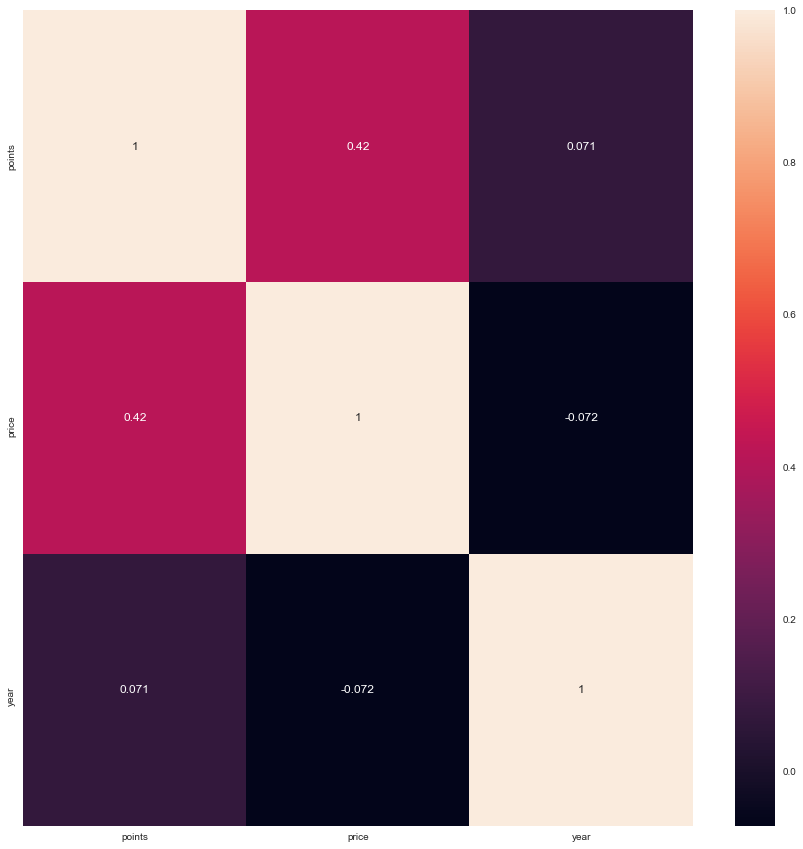

In [137]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(), annot=True);
plt.show()

In [138]:
data1.describe()

,points,price,year
count,111567.000000,111567.000000,107556.000000
mean,88.414065,35.620542,2010.654282
std,3.098856,42.107158,3.606722
min,80.000000,4.000000,1990.000000
25%,86.000000,17.000000,2009.000000
50%,88.000000,25.000000,2011.000000
75%,91.000000,42.000000,2013.000000
max,100.000000,3300.000000,2017.000000


In [139]:
wine_price_extremes = data1.groupby("variety").price.agg(["min", "max"])

In [140]:
reviewer_mean_ratings =data1.groupby(["taster_name"]).points.mean()
reviewer_mean_ratings

taster_name
Alexander Peartree    85.779528
Anna Lee C. Iijima    88.405888
Anne Krebiehl MW      90.677759
Carrie Dykes          86.343750
Christina Pickard     87.833333
Fiona Adams           86.750000
Jeff Jenssen          88.330275
Jim Gordon            88.603297
Joe Czerwinski        88.526168
Kerin O’Keefe         88.940938
Lauren Buzzeo         87.500632
Matt Kettmann         90.088089
Michael Schachner     86.859048
Mike DeSimone         89.121681
Paul Gregutt          89.098789
Roger Voss            88.624656
Sean P. Sullivan      88.755767
Susan Kostrzewa       86.585149
Virginie Boone        89.224398
Name: points, dtype: float64

In [141]:
is_word_used = data1.description.str.contains(
    pat = 'fruit|crisp|clean|sweet|tart|red|white|wood|apple|pear|pineapple|lemon|pomegranate|wood|oak|cherry|berry')

sum(is_word_used)/len(is_word_used)

0.9388977027257164

In [142]:
def wine_flavor(texto):
    sabor = ["fruit", "apple", "pear",'cherry','berry','pomegranate','tropical']

    if type(texto) is str:
        list_busqueda = texto.lower().split()

        for i, elem in enumerate(list_busqueda):
            for elemento in sabor:
                if elemento in elem:
                    return 1

    return 0

In [143]:
def wine_aci(texto):
    acidez = ["fixed acidity", 'pineapple', 'lemon','citric_acid','black plum','brigth acidity']

    if type(texto) is str:
        list_busqueda = texto.lower().split()

        for i, elem in enumerate(list_busqueda):
            for elemento in acidez:
                if elemento in elem:
                    return 1

    return 0

In [144]:
def wine_delicius(texto):
    delic = ["lovely", 'delicious','well balanced','excelend']

    if type(texto) is str:
        list_busqueda = texto.lower().split()

        for i, elem in enumerate(list_busqueda):
            for elemento in delic:
                if elemento in elem:
                    return 1

    return 0

In [145]:
# SABOR
data1['sabor'] = data1['description'].map(wine_flavor).astype(int)
# ACIDEZ
data1['acidez'] = data1['description'].map(wine_aci).astype(int)
#dELICIOUS
data1['delic'] = data1['description'].map(wine_delicius).astype(int)

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

In [146]:
data1.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year,sabor,acidez,delic
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011.0,1,0,0
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013.0,1,1,0
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,1,1,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,0,0,0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0,1,0,0


In [147]:
n = data1.isnull().sum()
n = n[n > 0]
n

country                     55
designation              32050
province                    55
region_1                 18011
region_2                 65008
taster_name              23268
taster_twitter_handle    27751
variety                      1
year                      4011
dtype: int64

In [148]:
data1.drop(['taster_name','taster_twitter_handle','region_2'],axis=1, inplace=True)

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [149]:
data1.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'title', 'variety', 'winery', 'year', 'sabor', 'acidez',
       'delic'],
      dtype='object')

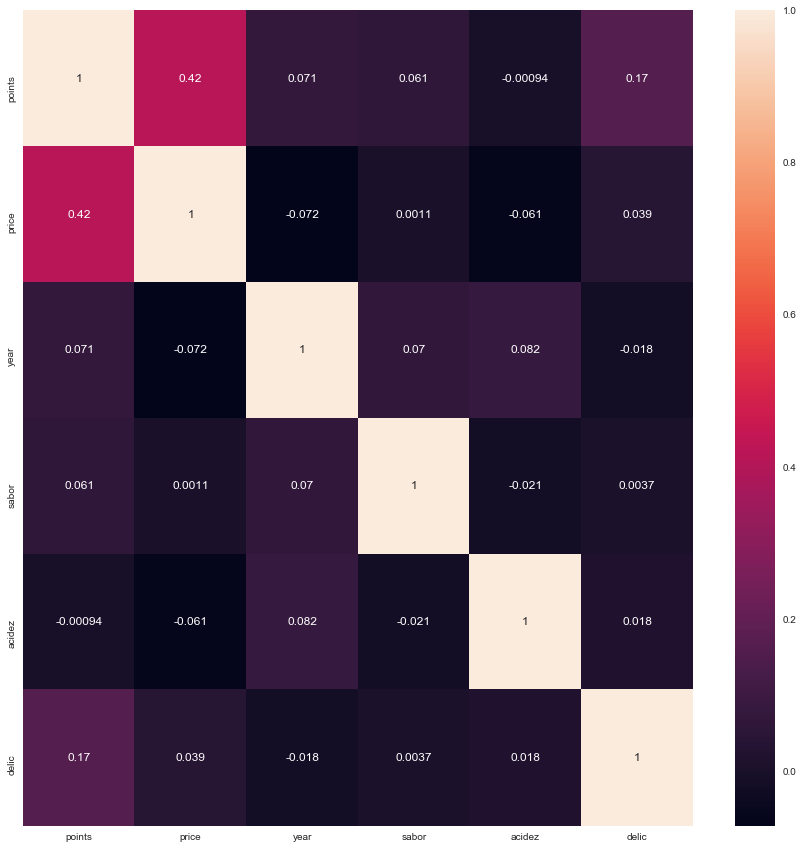

In [150]:
plt.figure(figsize=(15,15))
sns.heatmap(data1.corr(), annot=True);
plt.show()

In [151]:
print('\nVariety description \n', data1['variety'].describe())


Variety description 
 count         111566
unique           697
top       Pinot Noir
freq           11834
Name: variety, dtype: object


In [152]:
print('\nVariety description \n', data2['variety'].describe())


Variety description 
 count                         8388
unique                         265
top       Bordeaux-style Red Blend
freq                          1511
Name: variety, dtype: object


In [153]:
print('\n dESIGNATION description \n', data1['designation'].describe())


 dESIGNATION description 
 count       79517
unique      35772
top       Reserve
freq         1847
Name: designation, dtype: object


In [154]:
print('\n dESIGNATION description \n', data2['designation'].describe())


 dESIGNATION description 
 count              5906
unique             3988
top       Barrel sample
freq                364
Name: designation, dtype: object


In [155]:
wine_data.designation.value_counts()

Reserve                                   2009
Estate                                    1322
Reserva                                   1259
Riserva                                    698
Estate Grown                               621
Brut                                       513
Dry                                        413
Barrel sample                              375
Crianza                                    343
Estate Bottled                             342
Vieilles Vignes                            308
Brut Rosé                                  276
Gran Reserva                               261
Barrel Sample                              252
Tradition                                  238
Old Vine                                   221
Extra Dry                                  204
Rosé of                                    172
Rosé                                       166
Réserve                                    153
Single Vineyard                            131
Vintage      

In [156]:
wine_data.country.value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Czech Re

In [157]:
pais_wine=wine_data.groupby(['country'])

In [158]:
pais_wine.get_group('China')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
109989,China,This deep ruby-colored wine features a bouquet...,Noble Dragon,89,18.0,China,NaN,NaN,Mike DeSimone,@worldwineguys,Chateau Changyu-Castel 2009 Noble Dragon Red (...,Cabernet Blend,Chateau Changyu-Castel,2009.0


In [159]:
pais_wine.get_group('Slovakia')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
22687,Slovakia,"Delicious scents of honey, apples and petrol l...",NaN,87,16.0,Muzla,NaN,NaN,Anna Lee C. Iijima,NaN,Château Bela 2008 Riesling (Muzla),Riesling,Château Bela,2008.0


In [160]:
pais_wine.get_group('Egypt')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
110246,Egypt,"Ripe pear, apple and tropical fruit in the nos...",Caspar Blanc de Noirs,84,NaN,Egypt,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Sahara Vineyards 2008 Caspar Blanc de Noirs Gr...,Grenache,Sahara Vineyards,2008.0


In [161]:
pais_wine.get_group('Armenia')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
8170,Armenia,"Medium straw in the glass, this wine has a nos...",Estate Bottled,87,14.0,Armenia,NaN,NaN,Mike DeSimone,@worldwineguys,Van Ardi 2015 Estate Bottled Kangoun (Armenia),Kangoun,Van Ardi,2015.0
66146,Armenia,"Deep salmon in color, this wine offers a bouqu...",Estate Bottled,88,15.0,Armenia,NaN,NaN,Mike DeSimone,@worldwineguys,Van Ardi 2015 Estate Bottled Rosé (Armenia),Rosé,Van Ardi,2015.0


In [162]:
pais_wine.get_group('Bosnia and Herzegovina')

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,year
16467,Bosnia and Herzegovina,"Toasted oak and cedar notes meld into lush, ri...",Vranac,85,13.0,Mostar,NaN,NaN,Anna Lee C. Iijima,NaN,Winery Čitluk 2007 Vranac Vranec (Mostar),Vranec,Winery Čitluk,2007.0
96759,Bosnia and Herzegovina,A mix of red and black fruits pervade on the n...,NaN,88,12.0,Mostar,NaN,NaN,Jeff Jenssen,@worldwineguys,Winery Čitluk 2011 Blatina (Mostar),Blatina,Winery Čitluk,2011.0


In [163]:
wine_data.groupby('variety').sum()

,points,price,year
variety,,,
Abouriou,263,105.0,6038.0
Agiorgitiko,5483,1485.0,126510.0
Aglianico,32050,11433.0,717065.0
Aidani,82,27.0,2011.0
Airen,245,27.0,6027.0
Albana,2061,446.0,46287.0
Albanello,86,20.0,2012.0
Albariño,41854,10095.0,959952.0
Albarossa,176,80.0,4012.0


In [164]:
df1_sin_nan = data1.dropna(how='any')


In [165]:
df1_sin_nan.head(11)

,country,description,designation,points,price,province,region_1,title,variety,winery,year,sabor,acidez,delic
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013.0,1,1,0
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012.0,0,0,0
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011.0,1,0,0
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo,2013.0,1,0,0
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam,2012.0,1,0,0
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature,2011.0,0,0,0
16,Argentina,"Baked plum, molasses, balsamic vinegar and che...",Felix,87,30.0,Other,Cafayate,Felix Lavaque 2010 Felix Malbec (Cafayate),Malbec,Felix Lavaque,2010.0,1,0,0
17,Argentina,Raw black-cherry aromas are direct and simple ...,Winemaker Selection,87,13.0,Mendoza Province,Mendoza,Gaucho Andino 2011 Winemaker Selection Malbec ...,Malbec,Gaucho Andino,2011.0,1,0,0
18,Spain,"Desiccated blackberry, leather, charred wood a...",Vendimia Seleccionada Finca Valdelayegua Singl...,87,28.0,Northern Spain,Ribera del Duero,Pradorey 2010 Vendimia Seleccionada Finca Vald...,Tempranillo Blend,Pradorey,2010.0,1,0,0
20,US,Ripe aromas of dark berries mingle with ample ...,Vin de Maison,87,23.0,Virginia,Virginia,Quiévremont 2012 Vin de Maison Red (Virginia),Red Blend,Quiévremont,2012.0,0,0,0


In [166]:
df1_sin_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61510 entries, 3 to 129970
Data columns (total 14 columns):
country        61510 non-null object
description    61510 non-null object
designation    61510 non-null object
points         61510 non-null int64
price          61510 non-null float64
province       61510 non-null object
region_1       61510 non-null object
title          61510 non-null object
variety        61510 non-null object
winery         61510 non-null object
year           61510 non-null float64
sabor          61510 non-null int32
acidez         61510 non-null int32
delic          61510 non-null int32
dtypes: float64(2), int32(3), int64(1), object(8)
memory usage: 6.3+ MB


In [167]:
Cons = data1['description']

In [168]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

stop = set(stopwords.words('english'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    #pasar a minusculas separando por espacios
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized



In [169]:
 #Guardamos en una nueva serie

Cons_clean = [clean(comment).split() for comment in Cons] 

In [170]:
from gensim import corpora, models 
import gensim

In [171]:
# converting the corpus into a document-term matrix. every unique term is assigned an index.
#transforma una serie de comentarios en una matrix
dictionary = corpora.Dictionary(Cons_clean)

In [172]:
doc_term_matrix = [dictionary.doc2bow(comment) for comment in Cons_clean]


In [173]:

from sklearn.feature_extraction.text import CountVectorizer

In [174]:
from sklearn import preprocessing 

In [176]:
le  =  preprocessing.LabelEncoder() 

In [177]:

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

In [178]:
# Importando todo NLTK
import nltk
import re

In [179]:
# Stop words = Creacion de un conjunto unico desde el listado de stopwords en ingles que viene con el paquete NLTK. 

stop = set(stopwords.words('english'))

# Idem punto anterior, se excluyen signos de puntuacion 

exclude = set(string.punctuation) 

# Lemmatizacion de las palabras 
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized


In [180]:
def clean_text(text):
    text = re.sub('\r\n', ' ', text)
    text = re.sub('The', 'la', text)
    text = re.sub('the', 'el', text)
    text = re.sub('wine', ' ', text)
    text = re.sub('drink', ' ', text)
    text = re.sub('acidity', ' ', text)
    text = re.sub('aroma', ' ', text)
    text = re.sub('aromas', ' ', text)
    text = re.sub('finish', ' ', text)
    text = re.sub('fruit', ' ', text)
    text = re.sub('palate', ' ', text)
    text = re.sub('tannins', ' ', text)

    return text

In [235]:
def filter_func(x):
    return x["variety"].value_counts() > 100



In [182]:
modelo_cvec = CountVectorizer(stop_words=stop)

In [236]:
wine_data2=wine_data.iloc[:,[1,11]]

In [237]:
wine_data2.head()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


In [238]:
wine_data2.dropna()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir
5,Blackberry and raspberry aromas show a typical...,Tempranillo-Merlot
6,"Here's a bright, informal red that opens with ...",Frappato
7,This dry and restrained wine offers spice in p...,Gewürztraminer
8,Savory dried thyme notes accent sunnier flavor...,Gewürztraminer
9,This has great depth of flavor with its fresh ...,Pinot Gris


In [239]:
wine_data2.head()

,description,variety
0,"Aromas include tropical fruit, broom, brimston...",White Blend
1,"This is ripe and fruity, a wine that is smooth...",Portuguese Red
2,"Tart and snappy, the flavors of lime flesh and...",Pinot Gris
3,"Pineapple rind, lemon pith and orange blossom ...",Riesling
4,"Much like the regular bottling from 2012, this...",Pinot Noir


In [240]:
wine_data2['description'] = wine_data2['description'].map(lambda com : clean_text(com))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [241]:
wine_data2['description'] = wine_data2['description'].map(lambda com : clean(com))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [242]:
wine_data2['description']= wine_data2['description'].apply(lambda x: re.sub(r'([^\s\w]|_)+', '', x))

C:\Users\helen\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [243]:
wine_data2.variety.value_counts()

Pinot Noir                    13272
Chardonnay                    11753
Cabernet Sauvignon             9472
Red Blend                      8946
Bordeaux-style Red Blend       6915
Riesling                       5189
Sauvignon Blanc                4967
Syrah                          4142
Rosé                           3564
Merlot                         3102
Nebbiolo                       2804
Zinfandel                      2714
Sangiovese                     2707
Malbec                         2652
Portuguese Red                 2466
White Blend                    2360
Sparkling Blend                2153
Tempranillo                    1810
Rhône-style Red Blend          1471
Pinot Gris                     1455
Champagne Blend                1396
Cabernet Franc                 1353
Grüner Veltliner               1345
Portuguese White               1159
Bordeaux-style White Blend     1066
Pinot Grigio                   1052
Gamay                          1025
Gewürztraminer              

In [263]:
wine_data2['variety'].value_counts(normalize=True)

Pinot Noir                    0.108597
Chardonnay                    0.096168
Cabernet Sauvignon            0.077504
Red Blend                     0.073200
Bordeaux-style Red Blend      0.056582
Riesling                      0.042459
Sauvignon Blanc               0.040642
Syrah                         0.033892
Rosé                          0.029162
Merlot                        0.025382
Nebbiolo                      0.022944
Zinfandel                     0.022207
Sangiovese                    0.022150
Malbec                        0.021700
Portuguese Red                0.020178
White Blend                   0.019311
Sparkling Blend               0.017617
Tempranillo                   0.014810
Rhône-style Red Blend         0.012036
Pinot Gris                    0.011905
Champagne Blend               0.011423
Cabernet Franc                0.011071
Grüner Veltliner              0.011005
Portuguese White              0.009483
Bordeaux-style White Blend    0.008722
Pinot Grigio             

In [244]:
wine_data2=wine_data2.groupby('variety').filter(filter_func)[["description","variety"]]

In [245]:
wine_data2.loc[ wine_data2['variety'] =='Gamay',:]

,description,variety
30,red cherry come laced light giving bright open...,Gamay
42,festive soft ripe plus red berry flavor,Gamay
49,soft y generous ripe thats full juicy redcherr...,Gamay
95,dense packed brings el ageworthiness appellati...,Gamay
96,la come one el cru estate followed negociant h...,Gamay
110,produced cru vine el base mount brouilly el st...,Gamay
163,produced vineyard donated charitable hospital ...,Gamay
802,firm balancing solid ripe red s still young pa...,Gamay
818,la warm round full ripe berry soft ready full ...,Gamay
831,wood aging give el iness el added spice tannin...,Gamay


In [246]:
le.fit(wine_data2['variety'])  

LabelEncoder()

In [247]:
le.transform(wine_data2['variety'])  

array([87, 54, 49, ..., 24, 49, 24], dtype=int64)

In [248]:
wine_data2['var_codes'] = le.fit_transform(wine_data2['variety'])

In [249]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_data2['description'], wine_data2['var_codes'], test_size=0.33, random_state=42)

In [250]:
modelo_cvec = CountVectorizer(stop_words=stop)

In [251]:
X_train = modelo_cvec.fit_transform(X_train)

In [252]:
modelo_NB = MultinomialNB()
modelo_NB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [253]:
# Predicción
X_test = modelo_cvec.transform(X_test)
labels_predichas = modelo_NB.predict(X_test)

In [254]:
accuracy_score(y_test, labels_predichas)

0.4993181423718728

In [255]:
print (classification_report(y_test, labels_predichas))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       116
          1       0.00      0.00      0.00       152
          2       0.00      0.00      0.00        47
          3       1.00      0.00      0.01       238
          4       0.00      0.00      0.00        84
          5       0.00      0.00      0.00        36
          6       0.47      0.69      0.56      2313
          7       0.84      0.05      0.09       345
          8       1.00      0.00      0.01       449
          9       0.39      0.74      0.51      3051
         10       0.00      0.00      0.00        48
         11       0.00      0.00      0.00        31
         12       0.00      0.00      0.00       196
         13       0.89      0.28      0.43       451
         14       0.46      0.91      0.61      3873
         15       0.00      0.00      0.00       191
         16       1.00      0.02      0.04       228
         17       0.00      0.00      0.00   

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [256]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine_data2['description'], wine_data2['var_codes'], test_size=0.33, random_state=42)

In [257]:
from sklearn.feature_extraction.text import TfidfVectorizer
m1 = TfidfVectorizer()
X_train_vec = m1.fit_transform(X_train)

In [258]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [259]:
model.fit(X_train, y_train)
labels = model.predict(X_test)

In [260]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, labels)

0.3703354739530386

In [261]:
print (classification_report(y_test, labels))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00       116
          1       0.00      0.00      0.00       152
          2       0.00      0.00      0.00        47
          3       0.00      0.00      0.00       238
          4       0.00      0.00      0.00        84
          5       0.00      0.00      0.00        36
          6       0.56      0.53      0.55      2313
          7       0.00      0.00      0.00       345
          8       0.00      0.00      0.00       449
          9       0.37      0.65      0.47      3051
         10       0.00      0.00      0.00        48
         11       0.00      0.00      0.00        31
         12       0.00      0.00      0.00       196
         13       1.00      0.00      0.00       451
         14       0.31      0.96      0.47      3873
         15       0.00      0.00      0.00       191
         16       0.00      0.00      0.00       228
         17       0.00      0.00      0.00   

C:\Users\helen\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [262]:
wine_data2.loc[ wine_data2['var_codes'] == 29,:]

,description,variety,var_codes
57,lares touch toasted almond el start eln grillo...,Grillo,29
845,fragrant fresh grillo open alluring scent acac...,Grillo,29
1017,citrus yellow apple orange blossom saline take...,Grillo,29
1344,spanish broom yellow stone citrus zest take sh...,Grillo,29
1361,using sourced el vineyard feudo arancio near e...,Grillo,29
2409,lares touch toasted almond el start eln grillo...,Grillo,29
5970,aroma recalling spanish broom orchard come tog...,Grillo,29
5971,fresh straightforward white offer lime acacia ...,Grillo,29
5981,bright white offer lime pineapple citrus bloss...,Grillo,29
5991,intense fragrant white flower lemon tic herb l...,Grillo,29


In [265]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [269]:

model_svc = SVC(kernel='rbf', class_weight='balanced', C=1)

In [271]:
X_train, X_test, yt_train, yt_test = train_test_split(wine_data2['description'], wine_data2['variety'], test_size=0.33, random_state=42)

In [278]:
X_train = modelo_cvec.transform(X_train)
X_test = modelo_cvec.transform(X_test)

In [ ]:
model_svc.fit(X_train,y_train)

In [ ]:
y_pred = model_svc.predict(y_test)

In [ ]:
from sklearn.metrics import roc_auc_score, classification_report

In [ ]:
roc_auc_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test, yfit,
                            target_names=faces.target_names))